### Fetch data from UCI

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# Data (as pandas dataframes) 
X_raw = bank_marketing.data.features 
y_raw = bank_marketing.data.targets 
  
# Metadata 
print(bank_marketing.metadata) 
  
# Variable information 
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [2]:
type(bank_marketing)

ucimlrepo.dotdict.dotdict

In [3]:
X_raw

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [4]:
y_raw

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


### Data exploration

In [5]:
# See types
X_raw.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [6]:
# See nulls
X_raw.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [7]:
# See categories
[X_raw[col].value_counts() for col in X_raw.columns if X_raw[col].dtype == 'object']

[job
 blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 Name: count, dtype: int64,
 marital
 married     27214
 single      12790
 divorced     5207
 Name: count, dtype: int64,
 education
 secondary    23202
 tertiary     13301
 primary       6851
 Name: count, dtype: int64,
 default
 no     44396
 yes      815
 Name: count, dtype: int64,
 housing
 yes    25130
 no     20081
 Name: count, dtype: int64,
 loan
 no     37967
 yes     7244
 Name: count, dtype: int64,
 contact
 cellular     29285
 telephone     2906
 Name: count, dtype: int64,
 month
 may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 dec      214
 Name: count, dtype: int64,
 poutcome
 failure    4901
 other      1840
 succ

In [8]:
# Import seaborn and matplotlib for visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Summary statistics
X_raw.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


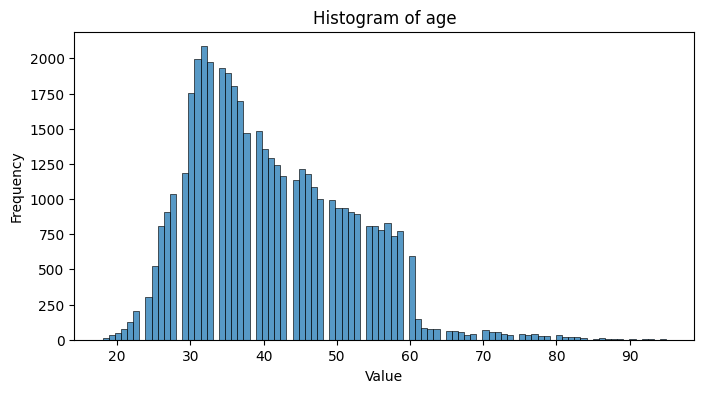

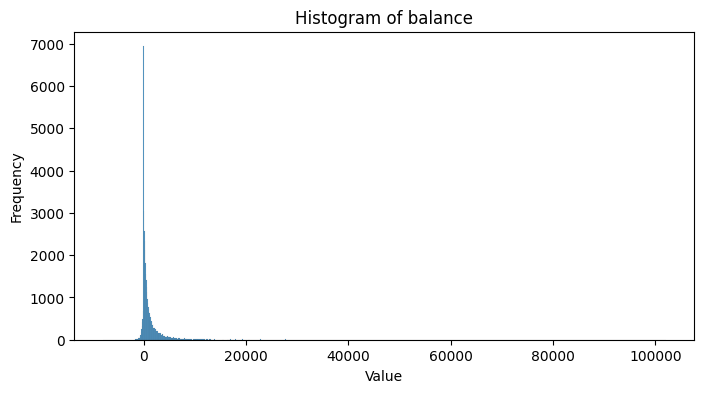

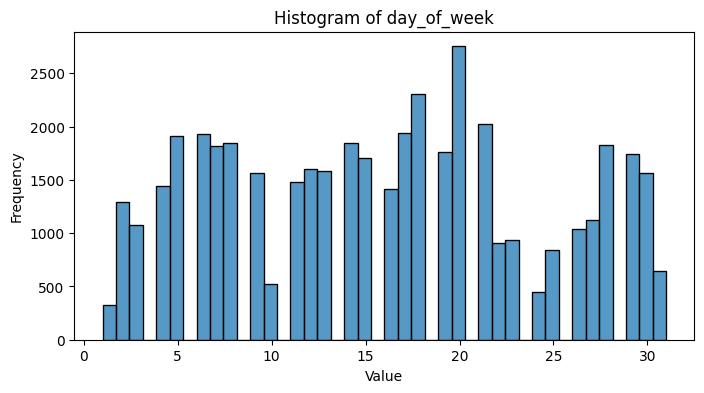

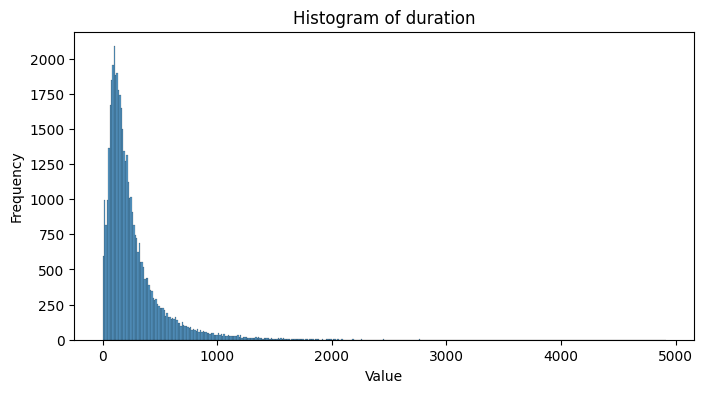

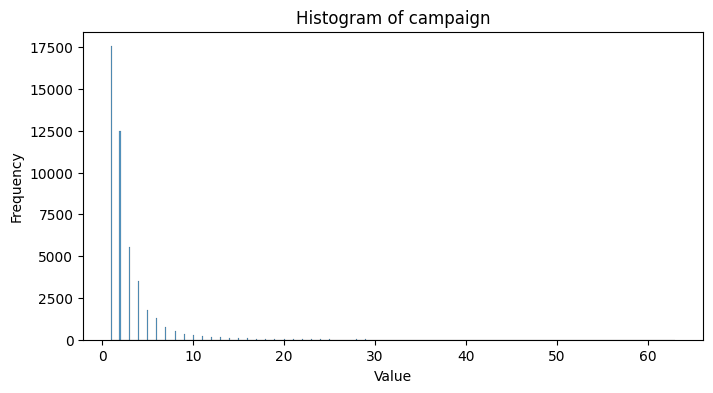

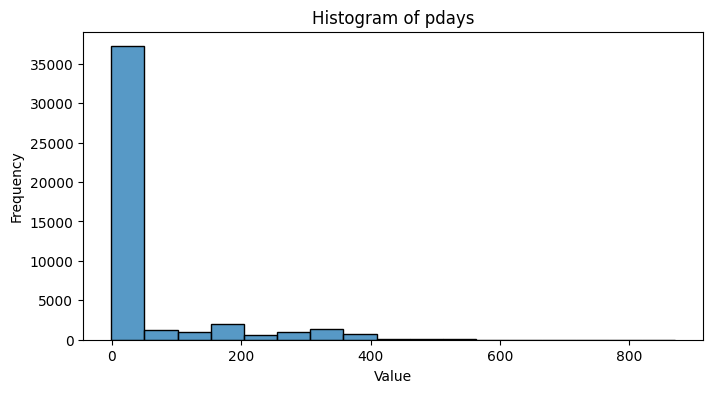

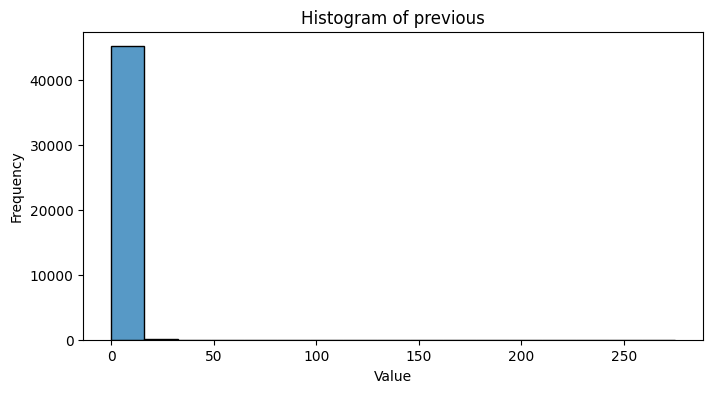

In [10]:
# Get numerical columns to plot
num_cols = [col for col in X_raw.columns if X_raw[col].dtype != 'object']

# Plot numerical columns
for column in num_cols:
    plt.figure(figsize=(8, 4))  # Set the size of each subplot
    sns.histplot(X_raw[column], kde=False)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

### Data transformation

There are several things we need to do to prepare the data for modelling:

- Fill categorical features that cointain nulls with 'other'
- OHE categorical features
- Standardise numerical features

These steps will be built into our modelling scripts. But let's create a quick model here using these steps to check they work first.

In [11]:
# Importing required sklearn pipeline methods
from sklearn.impute import SimpleImputer #ml transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder #ml transformations
from sklearn.compose import ColumnTransformer #generic column transformations
from sklearn.model_selection import train_test_split #splitting the data into train, val, test
from sklearn.metrics import roc_auc_score #scoring

from sklearn.linear_model import LogisticRegression #logistic regression algo 

from sklearn.pipeline import Pipeline #creating pipeline

In [12]:
# Convert y values
y_array = y_raw['y']
# Convert to binary
y_array_bin = y_array.map(dict(yes=1, no=0))

In [13]:
# Split data to train, test sets
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_array_bin, test_size=0.30, random_state=420)

In [14]:
 # Define categorical and numerical columns
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
# Define OHE mini-pipeline    
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Define Scalar mini-pipeline
non_categorical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))
])
# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', non_categorical_transformer, num_cols)
    ])

In [15]:
# Create a full pipeline including preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())])

In [16]:
# Fit to training data
pipeline.fit(X_train, y_train)

C:\Users\haydn\PycharmProjects\bank-marketing-e2e-model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['age', 'balance',
                                                   'day_of_week', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous'])])),
                ('model', LogisticRegression())])

In [17]:
# Create predictions
preds = pipeline.predict(X_test)

In [18]:
# Score predictions
roc_auc_score(y_test, preds)

0.6641244285380165